## Goal 1

In [1]:
pip install uniswap-python

In [6]:
pip install python-dotenv

In [37]:
import requests
import json
import pandas as pd

In [51]:
query = """{
 pairs(
  first: 1000,
orderBy: createdAtTimestamp){
     token0 {
       id
       symbol
       name
       derivedETH
     }
     token1 {
       id
       symbol
       name
       derivedETH
     }
     reserve0
     reserve1
     reserveUSD
     trackedReserveETH
     token0Price
     token1Price
     volumeUSD
     txCount
  createdAtTimestamp
 }
}"""

In [52]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"pairs":[{"createdAtTimestamp":"1588710145","reserve0":"120752772.209015","reserve1":"49583.528172022523041226","reserveUSD":"241720345.8247923150711603648325887","token0":{"derivedETH":"0.0004106202057721436053804330414991118","id":"0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48","name":"USD//C","symbol":"USDC"},"token0Price":"2435.34045802633467198895091852862","token1":{"derivedETH":"1","id":"0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2","name":"Wrapped Ether","symbol":"WETH"},"token1Price":"0.0004106202057721436053804330414991118","trackedReserveETH":"99167.056344045046082452","txCount":"2388130","volumeUSD":"28145264097.11992967632729138256322"},{"createdAtTimestamp":"1588712092","reserve0":"6.703306119180289502","reserve1":"6.663975","reserveUSD":"13.42720156578243681481200839852961","token0":{"derivedETH":"0.0004109405939589571630498168131620712","id":"0x8e870d67f660d95d5be530380d0ec0bd388289e1","name":"Paxos Standard","symbol":"PAX"},"token0Price":"1.00590205083006606447

In [53]:
json_data = json.loads(r.text)

In [54]:
df_data = json_data['data']['pairs']
df = pd.DataFrame(df_data)

In [55]:
df

,createdAtTimestamp,reserve0,reserve1,reserveUSD,token0,token0Price,token1,token1Price,trackedReserveETH,txCount,volumeUSD
0,1588710145,120752772.209015,49583.528172022523041226,241720345.8247923150711603648325887,{'derivedETH': '0.0004106202057721436053804330...,2435.34045802633467198895091852862,"{'derivedETH': '1', 'id': '0xc02aaa39b223fe8d0...",0.0004106202057721436053804330414991118,99167.056344045046082452,2388130,28145264097.11992967632729138256322
1,1588712092,6.703306119180289502,6.663975,13.42720156578243681481200839852961,{'derivedETH': '0.0004109405939589571630498168...,1.005902050830066064473531188217243,{'derivedETH': '0.0004106202057721436053804330...,0.9941325789869940941022477523970832,0.004863704052866582994283736073635473,22,0
2,1588788074,3752.554666621710251457,1.557078616148585304,7378.642782796927285192008832361792,{'derivedETH': '0.0004149382899064777849243212...,2409.996918398126743459015652420091,"{'derivedETH': '1', 'id': '0xc02aaa39b223fe8d0...",0.0004149382899064777849243212414061381,3.114157232297170608,705,0
3,1589164213,41494181.451010194950628741,17023.117034353247889986,82985431.72398157389967736444452454,{'derivedETH': '0.0004102531111368341565064380...,2437.519601567296978648944294376096,"{'derivedETH': '1', 'id': '0xc02aaa39b223fe8d0...",0.0004102531111368341565064380472255443,34046.234068706495779972,1185723,13422695556.45554632571308032411865
4,1589411030,563.334133509519439556,246.715809,492.0585746960904224423611819783065,{'derivedETH': '0.0001815668657439691884054784...,2.283332129355032289625185713170087,{'derivedETH': '0.0004106202057721436053804330...,0.4379564353095087219420371010936052,0.1986904853207851965877768952442454,1410,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1592086710,126900.3484,4.945785876576327919,24730.05992058468122156966157442809,{'derivedETH': '0.0000389737769748812440533851...,25658.27788886111860035344527257615,"{'derivedETH': '1', 'id': '0xc02aaa39b223fe8d0...",0.00003897377697488124405338512057229309,9.891571753152655837999999999999997,24,0
996,1592091302,0.00000009,0.000000000000115501,0.00000000005374160510031478067911792241172954,{'derivedETH': '0.0000012833444444444444444444...,779214.0327789369789006155790858954,"{'derivedETH': '1', 'id': '0xc02aaa39b223fe8d0...",0.000001283344444444444444444444444444444,0.000000000000231002,29,0
997,1592093922,7,0.000751741255629071,0.1832600626522876366011190584732807,"{'derivedETH': '0', 'id': '0x64e32cd68158cc656...",9311.714566127238029755028204995846,"{'derivedETH': '1', 'id': '0xc02aaa39b223fe8d0...",0.0001073916079470101428571428571428571,0.001503482511258142,23,0
998,1592095128,0.00000000000207184,0.000000000000000001,0.00000000000000047611110241243940378850461541...,{'derivedETH': '0.0000004826627538806085412000...,2071840,"{'derivedETH': '1', 'id': '0xc02aaa39b223fe8d0...",0.0000004826627538806085412000926712487451,0.000000000000000002,18,0


### ***Goal 2***


In [61]:
query = """{
 pairDayDatas(first: 100, orderBy: date, orderDirection: asc,
   where: {
     pairAddress: "0xa478c2975ab1ea89e8196811f51a7b7ade33eb11",
     date_gt: 1592505859
   }
 ) {
     date
     dailyVolumeToken0
     dailyVolumeToken1
     dailyVolumeUSD
     reserveUSD
 }
}"""

In [62]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"pairDayDatas":[{"dailyVolumeToken0":"844817.379810552296329406","dailyVolumeToken1":"3712.214450603412648749","dailyVolumeUSD":"846065.1184603746602466396667578224","date":1592524800,"reserveUSD":"7588737.250404029408685710025856693"},{"dailyVolumeToken0":"655053.424845959527078621","dailyVolumeToken1":"2896.06148282475438845","dailyVolumeUSD":"656589.0604655391933989350561931524","date":1592611200,"reserveUSD":"5252130.789620385796731024341739117"},{"dailyVolumeToken0":"829707.144185949142137397","dailyVolumeToken1":"3643.289404626872465951","dailyVolumeUSD":"831872.1218403767602662856185061517","date":1592697600,"reserveUSD":"3004511.699105305178802724047567991"},{"dailyVolumeToken0":"1489299.679426991509274998","dailyVolumeToken1":"6316.569593563461390807","dailyVolumeUSD":"1494791.807748486962104754764643087","date":1592784000,"reserveUSD":"3303489.214912155411152857998250317"},{"dailyVolumeToken0":"1078228.454886856022030446","dailyVolumeToken1":"4460.212645925923715

In [63]:
json_data = json.loads(r.text)

In [64]:
df_data = json_data['data']['pairDayDatas']
df = pd.DataFrame(df_data)

In [65]:
df

,dailyVolumeToken0,dailyVolumeToken1,dailyVolumeUSD,date,reserveUSD
0,844817.379810552296329406,3712.214450603412648749,846065.1184603746602466396667578224,1592524800,7588737.250404029408685710025856693
1,655053.424845959527078621,2896.06148282475438845,656589.0604655391933989350561931524,1592611200,5252130.789620385796731024341739117
2,829707.144185949142137397,3643.289404626872465951,831872.1218403767602662856185061517,1592697600,3004511.699105305178802724047567991
3,1489299.679426991509274998,6316.569593563461390807,1494791.807748486962104754764643087,1592784000,3303489.214912155411152857998250317
4,1078228.454886856022030446,4460.212645925923715858,1081048.253981774660835548028700355,1592870400,3318586.497046304295406066292281658
...,...,...,...,...,...
95,26695529.956703907332016916,79007.202677287876107424,26912167.7654868275617817902128096,1600732800,300739410.7468757653637292169727089
96,33942771.53255291846892753,103162.099531905682504959,34185272.09012455617268453997207595,1600819200,289131050.337245759701252038300764
97,25404137.191461920077907017,76692.06497146273242773,25613547.76964537870848741248348223,1600905600,317742230.3477047561911023665781911
98,20050865.330725644452143456,58257.202858912130397419,20198549.42102431727910476016840506,1600992000,298278347.3429120556577379400660132


### **Goal 3**

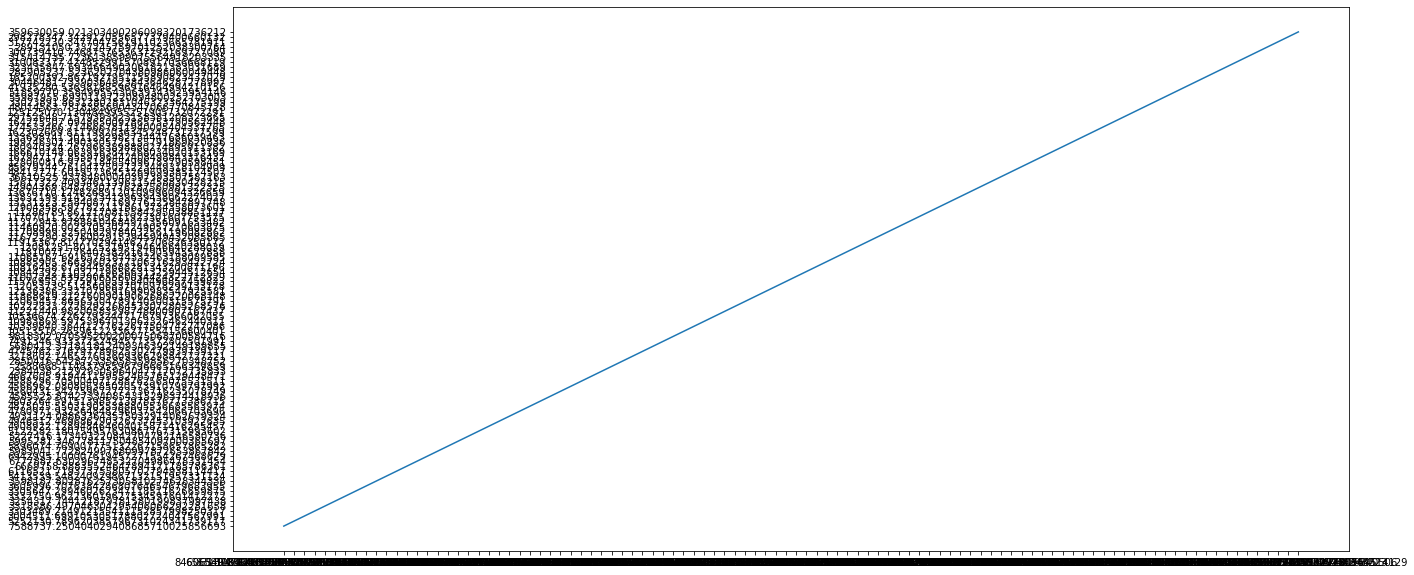

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df['dailyVolumeUSD'], df['reserveUSD'])

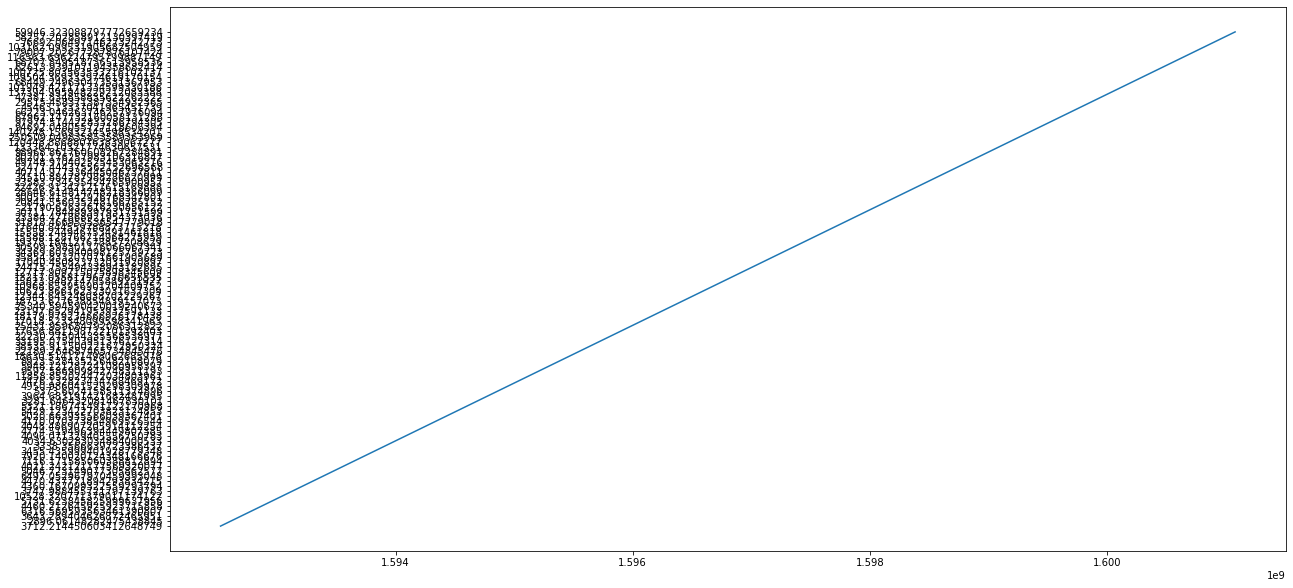

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df['date'], df['dailyVolumeToken1'])


This assignment I did is not perfect but I hope to learn and improve once i
 get an opportunity to learn from your guidance and mentorship.

Thanks and Best Regards.

Yashwant Yadav